# Use Vortex and arpifs_listings to plot a cost function timeserie

In [1]:
%load_ext ivortex
%vortex tmpcocoon

Vortex 1.4.0 loaded ( Thursday 09. August 2018, at 17:38:29 )


# [2018/08/09-17:38:30][vortex.sessions][_set_rundir:0150][WARNING]: Session <root> is changing its working directory </sauvegarde/vortex-dev/vortex/examples/notebooks/integration>
# [2018/08/09-17:38:30][vortex.sessions][_set_rundir:0153][INFO]: Session <root> set rundir </home/meunierlf/vortex-workdir/auto_cocoon_Qv8IkJ>


The working directory is now: /home/meunierlf/vortex-workdir/auto_cocoon_Qv8IkJ/root


u'/home/meunierlf/vortex-workdir/auto_cocoon_Qv8IkJ'

In [2]:
%pylab --no-import-all
%matplotlib inline
import matplotlib.dates as mdates  # used later on
from bronx.stdtypes import date

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


## Fetch listings and store the associated CostFunctions objects

In [3]:
xpids = ('OPER', )
d_begin = '2018010500'
d_end = '2018011023'
d_step = 'PT1H'
dates = date.daterangex(d_begin, d_end, d_step)

desc = dict(kind='plisting', cutoff='production', seta=1, setb=1,
            task='minim', model='[vapp]', vapp='arome', vconf='pifrance',
            namespace='vortex.multi.fr', format='arpifslist')

from collections import defaultdict
ldata = defaultdict(dict)

for xpid in xpids:
    with sh.ftppool():
        for i, idate in enumerate(dates):
            thelisting = toolbox.input(date=idate, shouldfly=True, now=True, verbose=False, loglevel='WARNING',
                                       experiment=xpid, block='minim', **desc)
            print '{:s} {:s}e: j={!s}'.format(xpid, idate.ymdh, 
                                             thelisting[0].contents.data.cost_functions[(999, 999)].j)
            ldata[xpid][idate] = thelisting[0].contents.data.cost_functions
            thelisting[0].reset_contents()
            thelisting[0].clear()

OPER 2018010500e: j=15416.0618749
OPER 2018010501e: j=15351.4478976
OPER 2018010502e: j=17314.1932725
OPER 2018010503e: j=17996.4409537
OPER 2018010504e: j=20032.6886737
OPER 2018010505e: j=20264.81265
OPER 2018010506e: j=19838.7602118
OPER 2018010507e: j=21749.3835522
OPER 2018010508e: j=22339.3888463
OPER 2018010509e: j=20074.059661
OPER 2018010510e: j=18637.7279634
OPER 2018010511e: j=15600.414872
OPER 2018010512e: j=14830.9612035
OPER 2018010513e: j=13911.1781732
OPER 2018010514e: j=11927.2064134
OPER 2018010515e: j=12605.9107348
OPER 2018010516e: j=11951.3809748
OPER 2018010517e: j=11023.4816952
OPER 2018010518e: j=10429.8971738
OPER 2018010519e: j=9486.23033295
OPER 2018010520e: j=10228.5592145
OPER 2018010521e: j=8816.72386865
OPER 2018010522e: j=9594.68239658
OPER 2018010523e: j=10289.5096195
OPER 2018010600e: j=12627.9374172
OPER 2018010601e: j=14349.696178
OPER 2018010602e: j=16150.8970096
OPER 2018010603e: j=17758.1300881
OPER 2018010604e: j=18802.7199371
OPER 2018010605e: j

## Define an utility function that will helps when plotting the data

In [4]:
def plot_timeserie(thedates, ylabel, datas, legends, ref=None):
    """Plot a time serie."""
    fig, ax = plt.subplots(figsize=(13,8))
    for (data, l) in zip(datas, legends):
        thedata = np.array(data)
        if ref is not None:
            thedata = thedata - ref
        ax.plot(mdates.date2num(thedates), thedata, label=l)

    # format the Xticks for dates
    months = mdates.MonthLocator()
    monthsFmt = mdates.DateFormatter('%Y-%m-%d')
    wdays = mdates.WeekdayLocator(byweekday=mdates.MO)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsFmt)
    ax.xaxis.set_minor_locator(wdays)

    # Label + legend...
    ax.grid(True)
    ax.set_ylabel(ylabel)
    ax.legend(loc='best', prop={'size':'small'})

    # rotates and right aligns the x labels, and moves the bottom of the
    # axes up to make room for them
    fig.autofmt_xdate()

## Plot timeseries of Jb and Jo

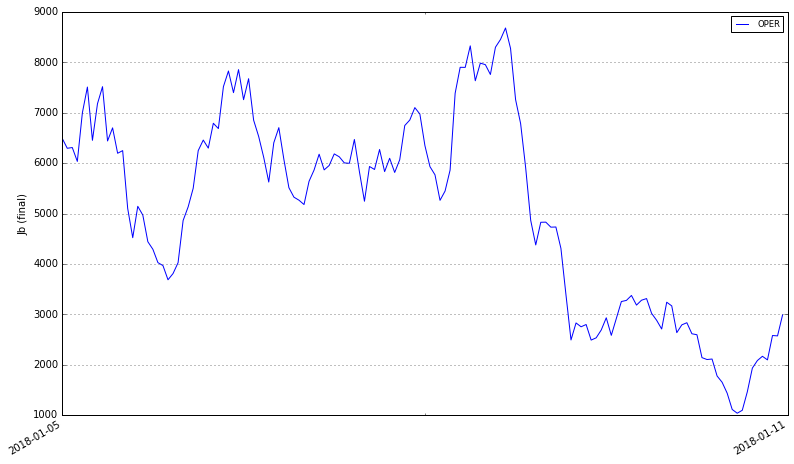

In [5]:
js = list()
for xpid in xpids:
    dates, j = zip(* [(d, v[(999, 999)].jb) for d, v in sorted(ldata[xpid].items())])
    js.append(j)
plot_timeserie(dates, 'Jb (final)', js, xpids)

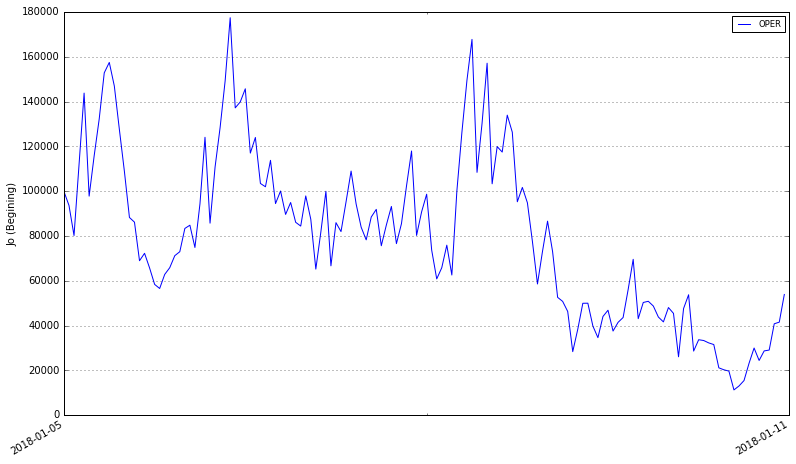

In [6]:
js = list()
for xpid in xpids:
    dates, j = zip(* [(d, v[(0, 0)].jo) for d, v in sorted(ldata[xpid].items())])
    js.append(j)
plot_timeserie(dates, 'Jo (Begining)', js, xpids)

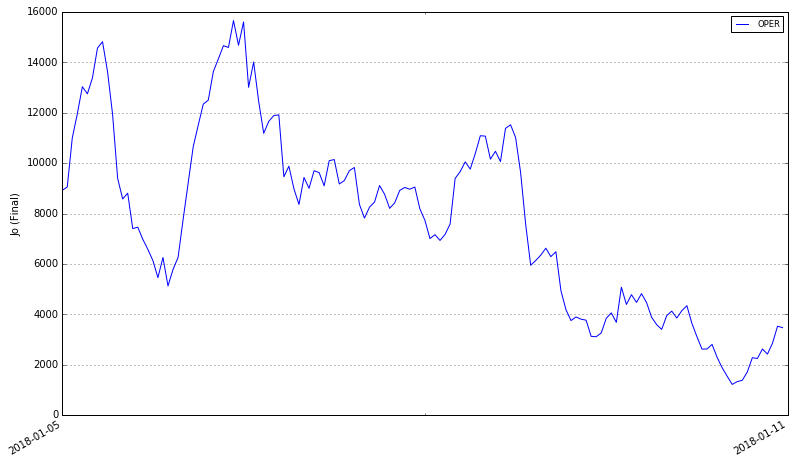

In [7]:
js = list()
for xpid in xpids:
    dates, j = zip(* [(d, v[(999, 999)].jo) for d, v in sorted(ldata[xpid].items())])
    js.append(j)
plot_timeserie(dates, 'Jo (Final)', js, xpids)